<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPの基礎と最適化アルゴリズム

+ データの読み込み
+ 前処理
+ ### MLPとは
 - ### 全結合層
 - ### バッチサイズ、エポック数などについて

#データの読み込み

In [13]:
#モデルデータの読み込み
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

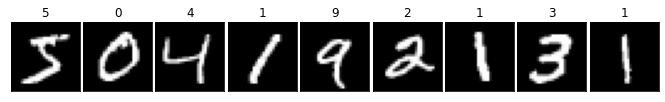

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# 各MNIST画像の上に（タイトルとして）対応するラベルを表示
for i in range(9):
    # add_subplot(行、列、場所、xticks,yticks:横/縦軸の目盛り線に表示する値をリストで指定)
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap="gray")

## 前処理

In [15]:
from tensorflow.keras.utils import to_categorical

# 入力画像を行列(28x28)からベクトル(長さ784)に変換
# MLPでは入力を(バッチサイズ（画像数）、画素数)の2次元テンソルとして扱う
#np.reshape()に-1を指定すると自動で整えられる
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 与えられたndarryをone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#多層パーセプトロン(Multi Layer Perceptron; MLP)

3つ以上の層からなり、それらすべては**全結合層**と**活性化関数**から成り立っている。

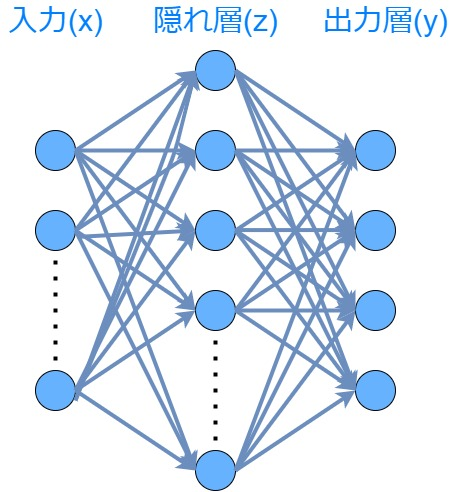

隠れ層の各ノードは以下の式で表される。
$$z_i=f(a_1x_1+a_2x_2+...+a_{784}x_{784}+b_i)$$
$$f：活性化関数$$


# モデルの構築


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 層を直列につなぐモデル
model = Sequential()

# 「容器」へ各layer（Dense, Activation）を積み重ねていく
# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# モデルの学習方法について指定しておく
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## 全結合層：Dense
```py
keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                        kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                        kernel_constraint=None, bias_constraint=None)
```

* units: 出力ユニット数($N$)
* activation: 出力ユニットに適用する活性化関数、Activationレイヤーの説明を参照
* use_bias: バイアス$b$を使用するか
* kernel_initializer: 重み行列$W$の初期化方法
* bias_initializer: バイアス$b$の初期化方法

## 訓練課程
`compile(self, optimizer, loss, metrics=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)`

- **optimizer**:  最適化手法

- **loss**: 損失関数/目的関数．

- **metrics**: 評価関数

＜以下あんまり使わないもの＞

sample_weight_mode, weighted_metrics, target_tensors

https://keras.io/ja/models/sequential/

In [17]:
history=model.fit(x_train, y_train,
            batch_size=1000, epochs=10, verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 2s 36ms/step - loss: 745701.2500 - accuracy: 0.1099 - val_loss: 2.3059 - val_accuracy: 0.1134
Epoch 2/10
60/60 [==============================] - 2s 32ms/step - loss: 2.3191 - accuracy: 0.1123 - val_loss: 2.3051 - val_accuracy: 0.1135
Epoch 3/10
60/60 [==============================] - 2s 37ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3050 - val_accuracy: 0.1135
Epoch 4/10
60/60 [==============================] - 2s 34ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3048 - val_accuracy: 0.1135
Epoch 5/10
60/60 [==============================] - 2s 36ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3047 - val_accuracy: 0.1135
Epoch 6/10
60/60 [==============================] - 2s 28ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3046 - val_accuracy: 0.1135
Epoch 7/10
60/60 [==============================] - 2s 28ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3046 - val_accuracy: 0.1135
Epoch 8/

## モデル構築

構築したモデルで実際に学習を行うには、Sequential.fit関数を用います。この関数は固定長のバッチで学習を行います。

主な引数は次の通りです。

* x：学習に使用する入力データ
* y：学習に使用する出力データ
* batch_size：学習中のパラメータ更新を1回行うにあたって用いるサンプル数（ミニバッチのサイズ）
* epochs：学習のエポック数
* verbose：学習のログを出力するか（0:しない、1：バーで出力、2:エポックごとに出力）
* validation_split/validation_data：検証用に用いるデータの割合（0～１の実数）
* shuffle：各エポックごとにデータをシャッフルするか
* callbacks：訓練中のモデルの挙動を監視できるcallback関数を指定できます

**バッチサイズ/ミニバッチ**：一度に学習させるデータ数。慣例的に$2^n$であることが多い。

**イテレーション数**：学習回数。$\frac{バッチサイズ}{データ数}$で自動的に決まる。

**epoch数**：データセット全体を何回学習に使用するか。目安は損失関数がほぼ収束するまで回す。

## モデル評価


In [ ]:
#モデル評価を行うmodel.evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

* x：評価に使用する入力データ
* y：評価に使用する出力データ
* batch_size：1回の評価を行うにあたって用いるサンプル数
* verbose：評価のログを出力するか（0:しない、1：する(デフォルト)）

In [18]:
#入力サンプルに対する予測値の出力を生成
classes = model.predict(x_test, batch_size=128)

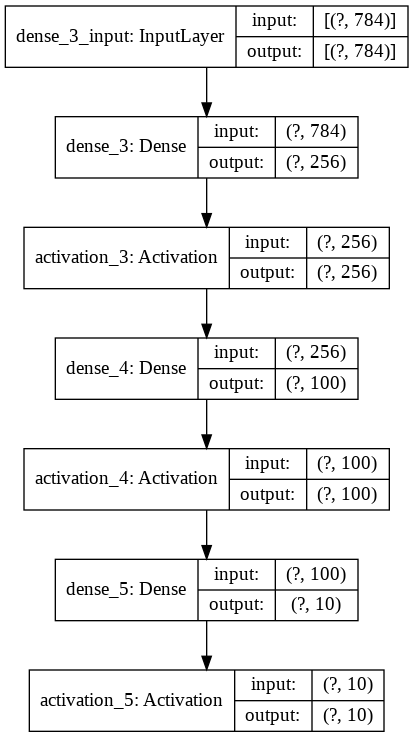

In [21]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,)

## 活性化関数：Activate
* sigmoid: $f(x)=\dfrac{1}{1+e^{-x}}$
* ReLU: $f(x)=\max(0,x)$
* tanh: $f(x)=\tanh(x)=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
* softmax: $f(x)=\dfrac{\exp(x_d)}{\sum_{d'} \exp(x_{d'})} \quad (x\in\mathbb{R}^D,\ d=1,2,\ldots,D)$ 予想確立を出す

In [ ]:
from keras.layers import Dense, Activation

# 活性化関数として relu を選択
model.add(Activation('relu'))
#Denseの層で定義することも可能
model.add(Dense(256, input_shape=(784,), activation='relu')) 

## Flatten
リストの入れ子になっているデータを1つのリストに展開
$[[1,2,3],[4,5],[7,[8,9]]]$ -> $[1,2,3,4,5,6,7,8,9]$

In [ ]:
model.add(Flatten()) # 次元の変化: (64, 32, 32) -> (65536,) (65536 = 64*32*32)

# 損失関数

最終目標は損失関数の最小化

- 連続地の場合
回帰問題でよく使用されるのが**平均二乗誤差**。これは神ミニバッチのデータ数を$N$として、

 $$E=\dfrac{1}{N}\sum_{n=1}^{N}(y_n-t_n)^2$$

この平均二乗誤差を使用する場合、compile関数の引数として`loss='mean_squared_error'`を指定

- 離散地の場合
**（多クラス）交差エントロピー**

$$E=-\dfrac{1}{N}\sum_{n=1}^N \left[t_n \ln y_n + (1-t_n) \ln (1-y_n) \right]$$

を使用し、多クラス分類（Kクラス）の場合は多クラス交差エントロピーとして

$$E=-\dfrac{1}{N}\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln y_{nk}$$

を用います。それぞれcompile関数の引数として`loss='binary_crossentropy'`、`loss='categorical_crossentropy'`を指定することで使用できます。


In [ ]:
#MNISTの場合
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# 評価関数

```py
model.summary()
```
によって、ネットワーク各層の出力が見られる


In [ ]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 活性化関数

**勾配消失問題**：ニューラルネットワークは**誤差逆電波法**によって、勾配が計算されている

つまり、**(ある相の勾配) = (1層前の勾配) x (2層前の勾配) x ... x (出力層の勾配)**と積の形で求めるため、

途中のから勾配の大きさが小さくなると入力層付近の勾配はどんどん0に近づく。

- Tanhの場合、入力値が0から離れると勾配が0に近くなるため、層が深くなると最適化が進みづらい
- ReLUの場合、常に勾配が1。前の層に勾配が伝わりやすく演算もシンプルで端末実装も容易。
- LeakyReLU: 0よりも小さな値にも勾配があり、勾配もパラメタとして学習できるPReLUもある。実装が重い
- ELU: 0よりも小さな値にも滑らかに変化する勾配がある。Softplus、SELUもこれに近い関数。実装が重い
‐ CReLU: CNNのフィルタには単純に符合を反転させたもののペアが存在する場合がある。これをCReLUを実装することで符号反転バージョンを作り、パラメタ数を減らすことができる。
- Swish: 強化学習を用いて発見された活性化関数。
